# Running correlations between gene expression and OTU abundance


Filtering steps (low abundance and low expression, or low variance genes/OTUs) were described in another notebook.
Here, I (RACS) use all filtered matrices for running correlations for each group of maize genotypes.

Importing the within sample (RPKM, TPM, CPM) and between sample (TMM, UQ, CTF, CUF) normalization matrices for day and night:

In [1]:
import pandas as pd

# Importing within sample normalized data after filtering
#kremling_expression_v5_day_tpm_filtered_cv_filtered = pd.read_csv('/home/santosrac/Repositories/maize_microbiome_transcriptomics/rnaseq_kremling2018/quantification/kremling_expression_v5_day_tpm_filtered_cv_filtered.tsv',
kremling_expression_v5_day_tpm_filtered_cv_filtered = pd.read_csv('/home/rsantos/Repositories/maize_microbiome_transcriptomics/rnaseq_kremling2018/quantification/kremling_expression_v5_day_tpm_filtered_cv_filtered.tsv',
                            sep='\t')
kremling_expression_v5_day_tpm_filtered_cv_filtered.set_index('Name', inplace=True)
#kremling_expression_v5_night_tpm_filtered_cv_filtered = pd.read_csv('/home/santosrac/Repositories/maize_microbiome_transcriptomics/rnaseq_kremling2018/quantification/kremling_expression_v5_night_tpm_filtered_cv_filtered.tsv',
kremling_expression_v5_night_tpm_filtered_cv_filtered = pd.read_csv('/home/rsantos/Repositories/maize_microbiome_transcriptomics/rnaseq_kremling2018/quantification/kremling_expression_v5_night_tpm_filtered_cv_filtered.tsv',
                            sep='\t')
kremling_expression_v5_night_tpm_filtered_cv_filtered.set_index('Name', inplace=True)
#kremling_expression_v5_day_rpkm_filtered_cv_filtered = pd.read_csv('/home/santosrac/Repositories/maize_microbiome_transcriptomics/rnaseq_kremling2018/quantification/kremling_expression_v5_day_rpkm_filtered_cv_filtered.tsv',
kremling_expression_v5_day_rpkm_filtered_cv_filtered = pd.read_csv('/home/rsantos/Repositories/maize_microbiome_transcriptomics/rnaseq_kremling2018/quantification/kremling_expression_v5_day_rpkm_filtered_cv_filtered.tsv',
                            sep='\t')
kremling_expression_v5_day_rpkm_filtered_cv_filtered.set_index('Name', inplace=True)
#kremling_expression_v5_night_rpkm_filtered_cv_filtered = pd.read_csv('/home/santosrac/Repositories/maize_microbiome_transcriptomics/rnaseq_kremling2018/quantification/kremling_expression_v5_night_rpkm_filtered_cv_filtered.tsv',
kremling_expression_v5_night_rpkm_filtered_cv_filtered = pd.read_csv('/home/rsantos/Repositories/maize_microbiome_transcriptomics/rnaseq_kremling2018/quantification/kremling_expression_v5_night_rpkm_filtered_cv_filtered.tsv',
                            sep='\t')
kremling_expression_v5_night_rpkm_filtered_cv_filtered.set_index('Name', inplace=True)
#kremling_expression_v5_day_cpm_filtered_cv_filtered = pd.read_csv('/home/santosrac/Repositories/maize_microbiome_transcriptomics/rnaseq_kremling2018/quantification/kremling_expression_v5_day_cpm_filtered_cv_filtered.tsv',
kremling_expression_v5_day_cpm_filtered_cv_filtered = pd.read_csv('/home/rsantos/Repositories/maize_microbiome_transcriptomics/rnaseq_kremling2018/quantification/kremling_expression_v5_day_cpm_filtered_cv_filtered.tsv',
                            sep='\t')
kremling_expression_v5_day_cpm_filtered_cv_filtered.set_index('Name', inplace=True)
#kremling_expression_v5_night_cpm_filtered_cv_filtered = pd.read_csv('/home/santosrac/Repositories/maize_microbiome_transcriptomics/rnaseq_kremling2018/quantification/kremling_expression_v5_night_cpm_filtered_cv_filtered.tsv',
kremling_expression_v5_night_cpm_filtered_cv_filtered = pd.read_csv('/home/rsantos/Repositories/maize_microbiome_transcriptomics/rnaseq_kremling2018/quantification/kremling_expression_v5_night_cpm_filtered_cv_filtered.tsv',
                            sep='\t')
kremling_expression_v5_night_cpm_filtered_cv_filtered.set_index('Name', inplace=True)

# Importing between sample normalized data after filtering
#kremling_expression_v5_day_tmm_filtered_cv_filtered = pd.read_csv('/home/santosrac/Repositories/maize_microbiome_transcriptomics/rnaseq_kremling2018/quantification/kremling_expression_v5_day_tmm_filtered_cv_filtered.tsv',
kremling_expression_v5_day_tmm_filtered_cv_filtered = pd.read_csv('/home/rsantos/Repositories/maize_microbiome_transcriptomics/rnaseq_kremling2018/quantification/kremling_expression_v5_day_tmm_filtered_cv_filtered.tsv',
                            sep='\t')
kremling_expression_v5_day_tmm_filtered_cv_filtered.set_index('Name', inplace=True)
#kremling_expression_v5_night_tmm_filtered_cv_filtered = pd.read_csv('/home/santosrac/Repositories/maize_microbiome_transcriptomics/rnaseq_kremling2018/quantification/kremling_expression_v5_night_tmm_filtered_cv_filtered.tsv',
kremling_expression_v5_night_tmm_filtered_cv_filtered = pd.read_csv('/home/rsantos/Repositories/maize_microbiome_transcriptomics/rnaseq_kremling2018/quantification/kremling_expression_v5_night_tmm_filtered_cv_filtered.tsv',
                            sep='\t')
kremling_expression_v5_night_tmm_filtered_cv_filtered.set_index('Name', inplace=True)
kremling_expression_v5_day_uq_filtered_cv_filtered = pd.read_csv('/home/rsantos/Repositories/maize_microbiome_transcriptomics/rnaseq_kremling2018/quantification/kremling_expression_v5_day_uq_filtered_cv_filtered.tsv',
#kremling_expression_v5_day_uq_filtered_cv_filtered = pd.read_csv('/home/santosrac/Repositories/maize_microbiome_transcriptomics/rnaseq_kremling2018/quantification/kremling_expression_v5_day_uq_filtered_cv_filtered.tsv',
                            sep='\t')
kremling_expression_v5_day_uq_filtered_cv_filtered.set_index('Name', inplace=True)
#kremling_expression_v5_night_uq_filtered_cv_filtered = pd.read_csv('/home/santosrac/Repositories/maize_microbiome_transcriptomics/rnaseq_kremling2018/quantification/kremling_expression_v5_night_uq_filtered_cv_filtered.tsv',
kremling_expression_v5_night_uq_filtered_cv_filtered = pd.read_csv('/home/rsantos/Repositories/maize_microbiome_transcriptomics/rnaseq_kremling2018/quantification/kremling_expression_v5_night_uq_filtered_cv_filtered.tsv',
                            sep='\t')
kremling_expression_v5_night_uq_filtered_cv_filtered.set_index('Name', inplace=True)
#kremling_expression_v5_day_ctf_filtered_cv_filtered = pd.read_csv('/home/santosrac/Repositories/maize_microbiome_transcriptomics/rnaseq_kremling2018/quantification/kremling_expression_v5_day_ctf_filtered_cv_filtered.tsv',
kremling_expression_v5_day_ctf_filtered_cv_filtered = pd.read_csv('/home/rsantos/Repositories/maize_microbiome_transcriptomics/rnaseq_kremling2018/quantification/kremling_expression_v5_day_ctf_filtered_cv_filtered.tsv',
                            sep='\t')
kremling_expression_v5_day_ctf_filtered_cv_filtered.set_index('Name', inplace=True)
#kremling_expression_v5_night_ctf_filtered_cv_filtered = pd.read_csv('/home/santosrac/Repositories/maize_microbiome_transcriptomics/rnaseq_kremling2018/quantification/kremling_expression_v5_night_ctf_filtered_cv_filtered.tsv',
kremling_expression_v5_night_ctf_filtered_cv_filtered = pd.read_csv('/home/rsantos/Repositories/maize_microbiome_transcriptomics/rnaseq_kremling2018/quantification/kremling_expression_v5_night_ctf_filtered_cv_filtered.tsv',
                            sep='\t')
kremling_expression_v5_night_ctf_filtered_cv_filtered.set_index('Name', inplace=True)
#kremling_expression_v5_day_cuf_filtered_cv_filtered = pd.read_csv('/home/santosrac/Repositories/maize_microbiome_transcriptomics/rnaseq_kremling2018/quantification/kremling_expression_v5_day_cuf_filtered_cv_filtered.tsv',
kremling_expression_v5_day_cuf_filtered_cv_filtered = pd.read_csv('/home/rsantos/Repositories/maize_microbiome_transcriptomics/rnaseq_kremling2018/quantification/kremling_expression_v5_day_cuf_filtered_cv_filtered.tsv',
                            sep='\t')
kremling_expression_v5_day_cuf_filtered_cv_filtered.set_index('Name', inplace=True)
#kremling_expression_v5_night_cuf_filtered_cv_filtered = pd.read_csv('/home/santosrac/Repositories/maize_microbiome_transcriptomics/rnaseq_kremling2018/quantification/kremling_expression_v5_night_cuf_filtered_cv_filtered.tsv',
kremling_expression_v5_night_cuf_filtered_cv_filtered = pd.read_csv('/home/rsantos/Repositories/maize_microbiome_transcriptomics/rnaseq_kremling2018/quantification/kremling_expression_v5_night_cuf_filtered_cv_filtered.tsv',
                            sep='\t')
kremling_expression_v5_night_cuf_filtered_cv_filtered.set_index('Name', inplace=True)

Importing OTU (CPM) matrices for day and night:

In [2]:
# Importing OTU data after filtering
#otu_table_merged_day_cpm_filtered_cv_filtered = pd.read_csv('/home/santosrac/Repositories/maize_microbiome_transcriptomics/16S_wallace2018/combine_day_night_samples/otu_table_merged_day_cpm_filtered_cv_filtered.tsv',
otu_table_merged_day_cpm_filtered_cv_filtered = pd.read_csv('/home/rsantos/Repositories/maize_microbiome_transcriptomics/16S_wallace2018/combine_day_night_samples/otu_table_merged_day_cpm_filtered_cv_filtered.tsv',
                            sep='\t')
otu_table_merged_day_cpm_filtered_cv_filtered.set_index('OTU ID', inplace=True)
#otu_table_merged_night_cpm_filtered_cv_filtered = pd.read_csv('/home/santosrac/Repositories/maize_microbiome_transcriptomics/16S_wallace2018/combine_day_night_samples/otu_table_merged_night_cpm_filtered_cv_filtered.tsv',
otu_table_merged_night_cpm_filtered_cv_filtered = pd.read_csv('/home/rsantos/Repositories/maize_microbiome_transcriptomics/16S_wallace2018/combine_day_night_samples/otu_table_merged_night_cpm_filtered_cv_filtered.tsv',
                            sep='\t')
otu_table_merged_night_cpm_filtered_cv_filtered.set_index('OTU ID', inplace=True)

## Importing groups

In [3]:
#wallace_et_al_2018_group_assignments_romay2013 = pd.read_csv('/home/santosrac/Repositories/maize_microbiome_transcriptomics/genotype_information/wallace_et_al_2018_group_assignments_romay2013.tsv',
wallace_et_al_2018_group_assignments_romay2013 = pd.read_csv('/home/rsantos/Repositories/maize_microbiome_transcriptomics/genotype_information/wallace_et_al_2018_group_assignments_romay2013.tsv',
                                                             sep='\t')
wallace_et_al_2018_group_assignments_romay2013.set_index('Plot_Day', inplace=True)
wallace_et_al_2018_group_assignments_romay2013.head()

,Genotype,Accesion N,N GBS samples,N Plants,Avg. IBS,% missing,Breeding program,Pop structure
Plot_Day,,,,,,,,
14A0309_26,33-16,Ames26771,4.0,3.0,0.998,0.34,Other,unclassified
14A0233_8,38-11,Ames26604,6.0,5.0,0.992,0.21,Other,unclassified
14A0079_26,4226,NSL30904,4.0,3.0,0.998,0.29,Other,unclassified
14A0311_8,4722,PI587130,3.0,2.0,0.998,0.39,Other,unclassified
14A0021_8,A188,Ames22443,8.0,7.0,0.996,0.29,Minnesota,unclassified


## Running correlations

I (RACS) will start by analyzing correlations in three largest groups:
* stiff stalk (39)
* tropical (38)
* non-stiff stalk (27)

In [4]:
from scipy import stats
from corals.threads import set_threads_for_external_libraries
set_threads_for_external_libraries(n_threads=1)
import numpy as np
from corals.correlation.full.default import cor_full

/home/rsantos/Repositories/maize_microbiome_transcriptomics/.venv/lib/python3.10/site-packages/corals/threads.py:48: UserWarning: This function should be called before `numpy` or similar modules are imported.
  warnings.warn("This function should be called before `numpy` or similar modules are imported.")


### OTU (CPM) vs Gene (CPM)

In [5]:
concat_df_night = pd.concat([kremling_expression_v5_night_cpm_filtered_cv_filtered, otu_table_merged_night_cpm_filtered_cv_filtered], axis=0)
concat_df_day = pd.concat([kremling_expression_v5_day_cpm_filtered_cv_filtered, otu_table_merged_day_cpm_filtered_cv_filtered], axis=0)

concatenated_transposed_day = concat_df_day.transpose()
concatenated_transposed_night = concat_df_night.transpose()

# Selecting runs of different subpopulations (stiff stalk, non-stiff stalk and tropical) to filter dataframes
stiff_stalk_runs_day = list(set(wallace_et_al_2018_group_assignments_romay2013[wallace_et_al_2018_group_assignments_romay2013['Pop structure']=='stiff stalk'].index).intersection(set(concatenated_transposed_day.index)))
stiff_stalk_runs_night = list(set(wallace_et_al_2018_group_assignments_romay2013[wallace_et_al_2018_group_assignments_romay2013['Pop structure']=='stiff stalk'].index).intersection(set(concatenated_transposed_night.index)))
non_stiff_stalk_runs_day = list(set(wallace_et_al_2018_group_assignments_romay2013[wallace_et_al_2018_group_assignments_romay2013['Pop structure']=='non-stiff stalk'].index).intersection(set(concatenated_transposed_day.index)))
non_stiff_stalk_runs_night = list(set(wallace_et_al_2018_group_assignments_romay2013[wallace_et_al_2018_group_assignments_romay2013['Pop structure']=='non-stiff stalk'].index).intersection(set(concatenated_transposed_night.index)))
tropical_runs_day = list(set(wallace_et_al_2018_group_assignments_romay2013[wallace_et_al_2018_group_assignments_romay2013['Pop structure']=='tropical'].index).intersection(set(concatenated_transposed_day.index)))
tropical_runs_night = list(set(wallace_et_al_2018_group_assignments_romay2013[wallace_et_al_2018_group_assignments_romay2013['Pop structure']=='tropical'].index).intersection(set(concatenated_transposed_night.index)))

# Calculating the correlations for each subpopulation
stiff_stalk_cor_values_day = cor_full(concatenated_transposed_day.loc[stiff_stalk_runs_day])
stiff_stalk_cor_values_night = cor_full(concatenated_transposed_night.loc[stiff_stalk_runs_night])
non_stiff_stalk_cor_values_day = cor_full(concatenated_transposed_day.loc[non_stiff_stalk_runs_day])
non_stiff_stalk_cor_values_night = cor_full(concatenated_transposed_night.loc[non_stiff_stalk_runs_night])
tropical_cor_values_day = cor_full(concatenated_transposed_day.loc[tropical_runs_day])
tropical_cor_values_night = cor_full(concatenated_transposed_night.loc[tropical_runs_night])

# Calculating pvalues and corrected pvalues
from corals.correlation.utils import derive_pvalues, multiple_test_correction

#stiff_stalk_cor_values_day = cor_full(concatenated_transposed_day.loc[stiff_stalk_runs_day])
n_samples = concatenated_transposed_day.loc[stiff_stalk_runs_day].shape[0]
n_features = concatenated_transposed_day.loc[stiff_stalk_runs_day].shape[1]
stiff_stalk_day_pvalues = derive_pvalues(stiff_stalk_cor_values_day, n_samples)
stiff_stalk_day_pvalues_corrected = multiple_test_correction(stiff_stalk_day_pvalues, n_features, method="bonferroni")

#stiff_stalk_cor_values_night = cor_full(concatenated_transposed_night.loc[stiff_stalk_runs_night])
n_samples = concatenated_transposed_night.loc[stiff_stalk_runs_night].shape[0]
n_features = concatenated_transposed_night.loc[stiff_stalk_runs_night].shape[1]
stiff_stalk_night_pvalues = derive_pvalues(stiff_stalk_cor_values_night, n_samples)
stiff_stalk_night_pvalues_corrected = multiple_test_correction(stiff_stalk_night_pvalues, n_features, method="bonferroni")

#non_stiff_stalk_cor_values_day = cor_full(concatenated_transposed_day.loc[non_stiff_stalk_runs_day])
n_samples = concatenated_transposed_day.loc[non_stiff_stalk_runs_day].shape[0]
n_features = concatenated_transposed_day.loc[non_stiff_stalk_runs_day].shape[1]
non_stiff_stalk_day_pvalues = derive_pvalues(non_stiff_stalk_cor_values_day, n_samples)
non_stiff_stalk_day_pvalues_corrected = multiple_test_correction(non_stiff_stalk_day_pvalues, n_features, method="bonferroni")

#non_stiff_stalk_cor_values_night = cor_full(concatenated_transposed_night.loc[non_stiff_stalk_runs_night])
n_samples = concatenated_transposed_night.loc[non_stiff_stalk_runs_night].shape[0]
n_features = concatenated_transposed_night.loc[non_stiff_stalk_runs_night].shape[1]
non_stiff_stalk_night_pvalues = derive_pvalues(non_stiff_stalk_cor_values_night, n_samples)
non_stiff_stalk_night_pvalues_corrected = multiple_test_correction(non_stiff_stalk_night_pvalues, n_features, method="bonferroni")

#tropical_cor_values_day = cor_full(concatenated_transposed_day.loc[tropical_runs_day])
n_samples = concatenated_transposed_day.loc[tropical_runs_day].shape[0]
n_features = concatenated_transposed_day.loc[tropical_runs_day].shape[1]
tropical_day_pvalues = derive_pvalues(tropical_cor_values_day, n_samples)
tropical_day_pvalues_corrected = multiple_test_correction(tropical_day_pvalues, n_features, method="bonferroni")

#tropical_cor_values_night = cor_full(concatenated_transposed_night.loc[tropical_runs_night])
n_samples = concatenated_transposed_night.loc[tropical_runs_night].shape[0]
n_features = concatenated_transposed_night.loc[tropical_runs_night].shape[1]
tropical_night_pvalues = derive_pvalues(tropical_cor_values_night, n_samples)
tropical_night_pvalues_corrected = multiple_test_correction(tropical_night_pvalues, n_features, method="bonferroni")

/home/rsantos/Repositories/maize_microbiome_transcriptomics/.venv/lib/python3.10/site-packages/corals/correlation/utils.py:227: RuntimeWarning: divide by zero encountered in divide
  ts = rf * rf * (df / (1 - rf * rf))
/home/rsantos/Repositories/maize_microbiome_transcriptomics/.venv/lib/python3.10/site-packages/corals/correlation/utils.py:227: RuntimeWarning: divide by zero encountered in divide
  ts = rf * rf * (df / (1 - rf * rf))
/home/rsantos/Repositories/maize_microbiome_transcriptomics/.venv/lib/python3.10/site-packages/corals/correlation/utils.py:227: RuntimeWarning: divide by zero encountered in divide
  ts = rf * rf * (df / (1 - rf * rf))
/home/rsantos/Repositories/maize_microbiome_transcriptomics/.venv/lib/python3.10/site-packages/corals/correlation/utils.py:227: RuntimeWarning: divide by zero encountered in divide
  ts = rf * rf * (df / (1 - rf * rf))
/home/rsantos/Repositories/maize_microbiome_transcriptomics/.venv/lib/python3.10/site-packages/corals/correlation/utils.py:2

In [14]:
# Selecting the pairs that have a correlation higher than threshold
cor_threshold = 0.6
cor_pvalue_threshold = 0.05

stiff_stalk_true_positions_day_cor = np.where(stiff_stalk_cor_values_day > cor_threshold)
stiff_stalk_true_positions_day_pval = np.where(stiff_stalk_day_pvalues_corrected < cor_pvalue_threshold)

cor_tuples = []
pval_tuples = []

for i in range(np.size(stiff_stalk_true_positions_day_cor, 1)):
    cor_tuples.append((stiff_stalk_true_positions_day_cor[0][i],
    stiff_stalk_true_positions_day_cor[1][i]))

for i in range(np.size(stiff_stalk_true_positions_day_pval, 1)):
    pval_tuples.append((stiff_stalk_true_positions_day_pval[0][i],
    stiff_stalk_true_positions_day_pval[1][i]))

cor_tuples_set = set(cor_tuples)
pval_tuples_set = set(pval_tuples)

cor_pval_intersection_day = cor_tuples_set.intersection(pval_tuples_set)

cor_pval_intersection_day_tuple = ([t[0] for t in list(cor_pval_intersection_day)],
[t[1] for t in list(cor_pval_intersection_day)])

pairs_stiff_stalk_day_genecpm_otucpm = []

shape_row_day = kremling_expression_v5_day_cpm_filtered_cv_filtered.shape[0]

for i in range(len(cor_pval_intersection_day_tuple[0])):
    if (cor_pval_intersection_day_tuple[1][i] > (shape_row_day - 1)) and (cor_pval_intersection_day_tuple[0][i] < shape_row_day):
        pairs_stiff_stalk_day_genecpm_otucpm.append((str(stiff_stalk_cor_values_day.columns[cor_pval_intersection_day_tuple[1][i]]),
              str(stiff_stalk_cor_values_day.index[cor_pval_intersection_day_tuple[0][i]]),
              stiff_stalk_cor_values_day.iloc[cor_pval_intersection_day_tuple[0][i], cor_pval_intersection_day_tuple[1][i]],
              stiff_stalk_day_pvalues_corrected[cor_pval_intersection_day_tuple[0][i], cor_pval_intersection_day_tuple[1][i]]))

In [15]:
# Selecting the pairs that have a correlation higher than threshold
cor_threshold = 0.6
cor_pvalue_threshold = 0.05

stiff_stalk_true_positions_night_cor = np.where(stiff_stalk_cor_values_night > cor_threshold)
stiff_stalk_true_positions_night_pval = np.where(stiff_stalk_night_pvalues_corrected < cor_pvalue_threshold)

cor_tuples = []
pval_tuples = []

for i in range(np.size(stiff_stalk_true_positions_night_cor, 1)):
    cor_tuples.append((stiff_stalk_true_positions_night_cor[0][i],
    stiff_stalk_true_positions_night_cor[1][i]))

for i in range(np.size(stiff_stalk_true_positions_night_pval, 1)):
    pval_tuples.append((stiff_stalk_true_positions_night_pval[0][i],
    stiff_stalk_true_positions_night_pval[1][i]))

cor_tuples_set = set(cor_tuples)
pval_tuples_set = set(pval_tuples)

cor_pval_intersection_night = cor_tuples_set.intersection(pval_tuples_set)

cor_pval_intersection_night_tuple = ([t[0] for t in list(cor_pval_intersection_night)],
[t[1] for t in list(cor_pval_intersection_night)])

pairs_stiff_stalk_night_genecpm_otucpm = []

shape_row_night = kremling_expression_v5_night_cpm_filtered_cv_filtered.shape[0]

for i in range(len(cor_pval_intersection_night_tuple[0])):
    if (cor_pval_intersection_night_tuple[1][i] > (shape_row_night - 1)) and (cor_pval_intersection_night_tuple[0][i] < shape_row_night):
        pairs_stiff_stalk_night_genecpm_otucpm.append((str(stiff_stalk_cor_values_night.columns[cor_pval_intersection_night_tuple[1][i]]),
              str(stiff_stalk_cor_values_night.index[cor_pval_intersection_night_tuple[0][i]]),
              stiff_stalk_cor_values_night.iloc[cor_pval_intersection_night_tuple[0][i], cor_pval_intersection_night_tuple[1][i]],
              stiff_stalk_night_pvalues_corrected[cor_pval_intersection_night_tuple[0][i], cor_pval_intersection_night_tuple[1][i]]))

In [16]:
# Selecting the pairs that have a correlation higher than threshold
cor_threshold = 0.6
cor_pvalue_threshold = 0.05

non_stiff_stalk_true_positions_day_cor = np.where(non_stiff_stalk_cor_values_day > cor_threshold)
non_stiff_stalk_true_positions_day_pval = np.where(non_stiff_stalk_day_pvalues_corrected < cor_pvalue_threshold)

cor_tuples = []
pval_tuples = []

for i in range(np.size(non_stiff_stalk_true_positions_day_cor, 1)):
    cor_tuples.append((non_stiff_stalk_true_positions_day_cor[0][i],
    non_stiff_stalk_true_positions_day_cor[1][i]))

for i in range(np.size(non_stiff_stalk_true_positions_day_pval, 1)):
    pval_tuples.append((non_stiff_stalk_true_positions_day_pval[0][i],
    non_stiff_stalk_true_positions_day_pval[1][i]))

cor_tuples_set = set(cor_tuples)
pval_tuples_set = set(pval_tuples)

cor_pval_intersection_day = cor_tuples_set.intersection(pval_tuples_set)

cor_pval_intersection_day_tuple = ([t[0] for t in list(cor_pval_intersection_day)],
[t[1] for t in list(cor_pval_intersection_day)])

pairs_non_stiff_stalk_day_genecpm_otucpm = []

shape_row_day = kremling_expression_v5_day_cpm_filtered_cv_filtered.shape[0]

for i in range(len(cor_pval_intersection_day_tuple[0])):
    if (cor_pval_intersection_day_tuple[1][i] > (shape_row_day - 1)) and (cor_pval_intersection_day_tuple[0][i] < shape_row_day):
        pairs_non_stiff_stalk_day_genecpm_otucpm.append((str(non_stiff_stalk_cor_values_day.columns[cor_pval_intersection_day_tuple[1][i]]),
              str(non_stiff_stalk_cor_values_day.index[cor_pval_intersection_day_tuple[0][i]]),
              non_stiff_stalk_cor_values_day.iloc[cor_pval_intersection_day_tuple[0][i], cor_pval_intersection_day_tuple[1][i]],
              non_stiff_stalk_day_pvalues_corrected[cor_pval_intersection_day_tuple[0][i], cor_pval_intersection_day_tuple[1][i]]))

In [17]:
# Selecting the pairs that have a correlation higher than threshold
cor_threshold = 0.6
cor_pvalue_threshold = 0.05

non_stiff_stalk_true_positions_night_cor = np.where(non_stiff_stalk_cor_values_night > cor_threshold)
non_stiff_stalk_true_positions_night_pval = np.where(non_stiff_stalk_night_pvalues_corrected < cor_pvalue_threshold)

cor_tuples = []
pval_tuples = []

for i in range(np.size(non_stiff_stalk_true_positions_night_cor, 1)):
    cor_tuples.append((non_stiff_stalk_true_positions_night_cor[0][i],
    non_stiff_stalk_true_positions_night_cor[1][i]))

for i in range(np.size(non_stiff_stalk_true_positions_night_pval, 1)):
    pval_tuples.append((non_stiff_stalk_true_positions_night_pval[0][i],
    non_stiff_stalk_true_positions_night_pval[1][i]))

cor_tuples_set = set(cor_tuples)
pval_tuples_set = set(pval_tuples)

cor_pval_intersection_night = cor_tuples_set.intersection(pval_tuples_set)

cor_pval_intersection_night_tuple = ([t[0] for t in list(cor_pval_intersection_night)],
[t[1] for t in list(cor_pval_intersection_night)])

pairs_non_stiff_stalk_night_genecpm_otucpm = []

shape_row_night = kremling_expression_v5_night_cpm_filtered_cv_filtered.shape[0]

for i in range(len(cor_pval_intersection_night_tuple[0])):
    if (cor_pval_intersection_night_tuple[1][i] > (shape_row_night - 1)) and (cor_pval_intersection_night_tuple[0][i] < shape_row_night):
        pairs_non_stiff_stalk_night_genecpm_otucpm.append((str(non_stiff_stalk_cor_values_night.columns[cor_pval_intersection_night_tuple[1][i]]),
              str(non_stiff_stalk_cor_values_night.index[cor_pval_intersection_night_tuple[0][i]]),
              non_stiff_stalk_cor_values_night.iloc[cor_pval_intersection_night_tuple[0][i], cor_pval_intersection_night_tuple[1][i]],
              non_stiff_stalk_night_pvalues_corrected[cor_pval_intersection_night_tuple[0][i], cor_pval_intersection_night_tuple[1][i]]))

In [19]:
# Selecting the pairs that have a correlation higher than threshold
cor_threshold = 0.6
cor_pvalue_threshold = 0.05

tropical_true_positions_day_cor = np.where(tropical_cor_values_day > cor_threshold)
tropical_true_positions_day_pval = np.where(tropical_day_pvalues_corrected < cor_pvalue_threshold)

cor_tuples = []
pval_tuples = []

for i in range(np.size(tropical_true_positions_day_cor, 1)):
    cor_tuples.append((tropical_true_positions_day_cor[0][i],
    tropical_true_positions_day_cor[1][i]))

for i in range(np.size(tropical_true_positions_day_pval, 1)):
    pval_tuples.append((tropical_true_positions_day_pval[0][i],
    tropical_true_positions_day_pval[1][i]))

cor_tuples_set = set(cor_tuples)
pval_tuples_set = set(pval_tuples)

cor_pval_intersection_day = cor_tuples_set.intersection(pval_tuples_set)

cor_pval_intersection_day_tuple = ([t[0] for t in list(cor_pval_intersection_day)],
[t[1] for t in list(cor_pval_intersection_day)])

pairs_tropical_day_genecpm_otucpm = []

shape_row_day = kremling_expression_v5_day_cpm_filtered_cv_filtered.shape[0]

for i in range(len(cor_pval_intersection_day_tuple[0])):
    if (cor_pval_intersection_day_tuple[1][i] > (shape_row_day - 1)) and (cor_pval_intersection_day_tuple[0][i] < shape_row_day):
        pairs_tropical_day_genecpm_otucpm.append((str(tropical_cor_values_day.columns[cor_pval_intersection_day_tuple[1][i]]),
              str(tropical_cor_values_day.index[cor_pval_intersection_day_tuple[0][i]]),
              tropical_cor_values_day.iloc[cor_pval_intersection_day_tuple[0][i], cor_pval_intersection_day_tuple[1][i]],
              tropical_day_pvalues_corrected[cor_pval_intersection_day_tuple[0][i], cor_pval_intersection_day_tuple[1][i]]))

In [20]:
# Selecting the pairs that have a correlation higher than threshold
cor_threshold = 0.6
cor_pvalue_threshold = 0.05

tropical_true_positions_night_cor = np.where(tropical_cor_values_night > cor_threshold)
tropical_true_positions_night_pval = np.where(tropical_night_pvalues_corrected < cor_pvalue_threshold)

cor_tuples = []
pval_tuples = []

for i in range(np.size(tropical_true_positions_night_cor, 1)):
    cor_tuples.append((tropical_true_positions_night_cor[0][i],
    tropical_true_positions_night_cor[1][i]))

for i in range(np.size(tropical_true_positions_night_pval, 1)):
    pval_tuples.append((tropical_true_positions_night_pval[0][i],
    tropical_true_positions_night_pval[1][i]))

cor_tuples_set = set(cor_tuples)
pval_tuples_set = set(pval_tuples)

cor_pval_intersection_night = cor_tuples_set.intersection(pval_tuples_set)

cor_pval_intersection_night_tuple = ([t[0] for t in list(cor_pval_intersection_night)],
[t[1] for t in list(cor_pval_intersection_night)])

pairs_tropical_night_genecpm_otucpm = []

shape_row_night = kremling_expression_v5_night_cpm_filtered_cv_filtered.shape[0]

for i in range(len(cor_pval_intersection_night_tuple[0])):
    if (cor_pval_intersection_night_tuple[1][i] > (shape_row_night - 1)) and (cor_pval_intersection_night_tuple[0][i] < shape_row_night):
        pairs_tropical_night_genecpm_otucpm.append((str(tropical_cor_values_night.columns[cor_pval_intersection_night_tuple[1][i]]),
              str(tropical_cor_values_night.index[cor_pval_intersection_night_tuple[0][i]]),
              tropical_cor_values_night.iloc[cor_pval_intersection_night_tuple[0][i], cor_pval_intersection_night_tuple[1][i]],
              tropical_night_pvalues_corrected[cor_pval_intersection_night_tuple[0][i], cor_pval_intersection_night_tuple[1][i]]))

In [21]:
print(len(pairs_stiff_stalk_day_genecpm_otucpm))
print(len(pairs_stiff_stalk_night_genecpm_otucpm))
print(len(pairs_non_stiff_stalk_day_genecpm_otucpm))
print(len(pairs_non_stiff_stalk_night_genecpm_otucpm))
print(len(pairs_tropical_day_genecpm_otucpm))
print(len(pairs_tropical_night_genecpm_otucpm))

1387
3950
1556
2743
997
1648


In [22]:
import upsetplot

from upsetplot import from_contents

In [30]:
k1 = [(k[0], k[1]) for k in pairs_stiff_stalk_day_genecpm_otucpm]
k3 = [(k[0], k[1]) for k in pairs_non_stiff_stalk_day_genecpm_otucpm]
k5 = [(k[0], k[1]) for k in pairs_tropical_day_genecpm_otucpm]

k2 = [(k[0], k[1]) for k in pairs_stiff_stalk_night_genecpm_otucpm]
k4 = [(k[0], k[1]) for k in pairs_non_stiff_stalk_night_genecpm_otucpm]
k6 = [(k[0], k[1]) for k in pairs_tropical_night_genecpm_otucpm]

correlations_day = from_contents(
    {"Gene (cpm) OTU (cpm) - Stiff Stalk": k1,
    "Gene (cpm) OTU (cpm) - Non-Stiff Stalk": k3,
    "Gene (cpm) OTU (cpm) - Tropical": k5}
)

correlations_night = from_contents(
    {"Gene (cpm) OTU (cpm) - Stiff Stalk": k2,
    "Gene (cpm) OTU (cpm) - Non-Stiff Stalk": k4,
    "Gene (cpm) OTU (cpm) - Tropical": k6}
)

otucpm_genecpm_groups_day = set(k1).intersection(set(k3),
                                             set(k5))

otucpm_genecpm_groups_night = set(k2).intersection(set(k4),
                                             set(k6))

/home/rsantos/Repositories/maize_microbiome_transcriptomics/.venv/lib/python3.10/site-packages/upsetplot/data.py:385: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.fillna(False, inplace=True)
/home/rsantos/Repositories/maize_microbiome_transcriptomics/.venv/lib/python3.10/site-packages/upsetplot/data.py:385: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.fillna(False, inplace=True)


/home/rsantos/Repositories/maize_microbiome_transcriptomics/.venv/lib/python3.10/site-packages/upsetplot/plotting.py:795: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  styles["linewidth"].fillna(1, inplace=True)
/home/rsantos/Repositories/maize_microbiome_transcriptomics/.venv/lib/python3.10/site-packages/upsetplot/plotting.py:796: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will nev

Text(0.5, 1.0, 'TITLE')

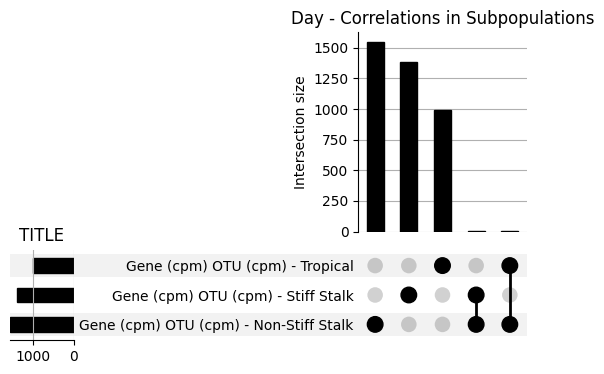

In [31]:
from upsetplot import UpSet
import matplotlib.pyplot as plt

ax_dict = UpSet(correlations_day, subset_size="count").plot()

plt.title('Day - Correlations in Subpopulations')
ax_dict['totals'].set_title('TITLE')

/home/rsantos/Repositories/maize_microbiome_transcriptomics/.venv/lib/python3.10/site-packages/upsetplot/plotting.py:795: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  styles["linewidth"].fillna(1, inplace=True)
/home/rsantos/Repositories/maize_microbiome_transcriptomics/.venv/lib/python3.10/site-packages/upsetplot/plotting.py:796: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will nev

Text(0.5, 1.0, 'TITLE')

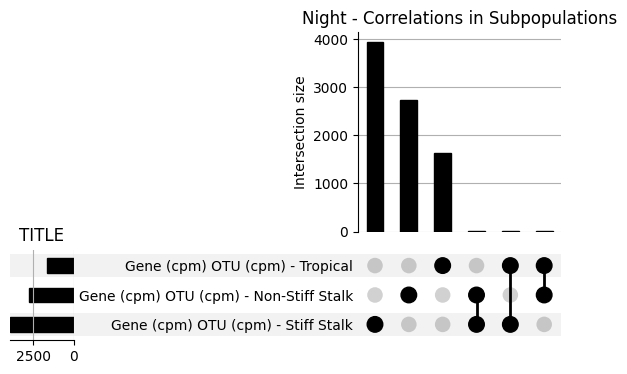

In [32]:
from upsetplot import UpSet
import matplotlib.pyplot as plt

ax_dict = UpSet(correlations_night, subset_size="count").plot()

plt.title('Night - Correlations in Subpopulations')
ax_dict['totals'].set_title('TITLE')

### Method using scipy

Method from stats module of the Scipy library is much slower:

In [ ]:
rng = np.random.default_rng()
method = stats.PermutationMethod(n_resamples=10000, random_state=rng)

significance_stiff_stalk_day = []
significance_stiff_stalk_night = []
significance_non_stiff_stalk_day = []
significance_non_stiff_stalk_night = []
significance_tropical_day = []
significance_tropical_night = []

for pair in stiff_stalk_pairs_day_genecpm_otucpm:
    stat_res = stats.pearsonr(concatenated_transposed_day.loc[stiff_stalk_runs_day][pair[0]],
               concatenated_transposed_day.loc[stiff_stalk_runs_day][pair[1]],
               method=method)
    significance_stiff_stalk_day.append({'otu': pair[0],
                                         'gene': pair[1],
                                         'pvalue': stat_res.pvalue,
                                         'statistic': stat_res.statistic})

for pair in stiff_stalk_pairs_night_genecpm_otucpm:
    stat_res = stats.pearsonr(concatenated_transposed_night.loc[stiff_stalk_runs_night][pair[0]],
               concatenated_transposed_night.loc[stiff_stalk_runs_night][pair[1]],
               method=method)
    significance_stiff_stalk_night.append({'otu': pair[0],
                                         'gene': pair[1],
                                         'pvalue': stat_res.pvalue,
                                         'statistic': stat_res.statistic})

for pair in non_stiff_stalk_pairs_day_genecpm_otucpm:
    stat_res = stats.pearsonr(concatenated_transposed_day.loc[non_stiff_stalk_runs_day][pair[0]],
               concatenated_transposed_day.loc[non_stiff_stalk_runs_day][pair[1]],
               method=method)
    significance_non_stiff_stalk_day.append({'otu': pair[0],
                                         'gene': pair[1],
                                         'pvalue': stat_res.pvalue,
                                         'statistic': stat_res.statistic})

for pair in non_stiff_stalk_pairs_night_genecpm_otucpm:
    stat_res = stats.pearsonr(concatenated_transposed_night.loc[non_stiff_stalk_runs_night][pair[0]],
               concatenated_transposed_night.loc[non_stiff_stalk_runs_night][pair[1]],
               method=method)
    significance_non_stiff_stalk_night.append({'otu': pair[0],
                                         'gene': pair[1],
                                         'pvalue': stat_res.pvalue,
                                         'statistic': stat_res.statistic})

for pair in tropical_pairs_day_genecpm_otucpm:
    stat_res = stats.pearsonr(concatenated_transposed_day.loc[tropical_runs_day][pair[0]],
               concatenated_transposed_day.loc[tropical_runs_day][pair[1]],
               method=method)
    significance_tropical_day.append({'otu': pair[0],
                                         'gene': pair[1],
                                         'pvalue': stat_res.pvalue,
                                         'statistic': stat_res.statistic})

for pair in tropical_pairs_night_genecpm_otucpm:
    stat_res = stats.pearsonr(concatenated_transposed_night.loc[tropical_runs_night][pair[0]],
               concatenated_transposed_night.loc[tropical_runs_night][pair[1]],
               method=method)
    significance_tropical_night.append({'otu': pair[0],
                                         'gene': pair[1],
                                         'pvalue': stat_res.pvalue,
                                         'statistic': stat_res.statistic})